In [2]:
from google.colab import files
uploaded = files.upload()

Saving tips.csv to tips.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


https://www.kaggle.com/tasneemabdulrahim/tips-dataset

In [5]:
# 빈도표
import pandas as pd
import numpy as np

party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [6]:
pd.pivot_table(tips,index='day',
               columns='size',
               values='total_bill',
               aggfunc='count',fill_value = 0)

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [7]:
pc_25 = party_counts.loc[:,2:5]
pc_25

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [8]:
pc_25.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [9]:
# pc_25 각 열방향 합계 1로 정규화
pc_25.apply(lambda x : x/pc_25.sum(1))

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [10]:
pc_25.div(pc_25.sum(1),axis=0)

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


팁이 10이고 총 청구 금액이 100인 경우, 팁의 퍼센트를 마크업과 마진으로 계산한 결과는 다음과 같습니다:

마크업 (Markup): 약 11.11%
- 마크업은 기본 비용에 대한 추가 비용(여기서는 팁)의 비율
- Tip / (Total Bill - Tip) x 100

마진 (Margin): 10%
- 마진은 전체 판매 가격(여기서는 총 청구 금액)에 대한 추가 비용(팁)의 비율
- Tip / Total Bill x 100

마크업은 순수한 비용(총 금액에서 팁을 제외한 금액)에 대한 추가 비용의 비율을, 마진은 전체 금액에 대한 추가 비용의 비율

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

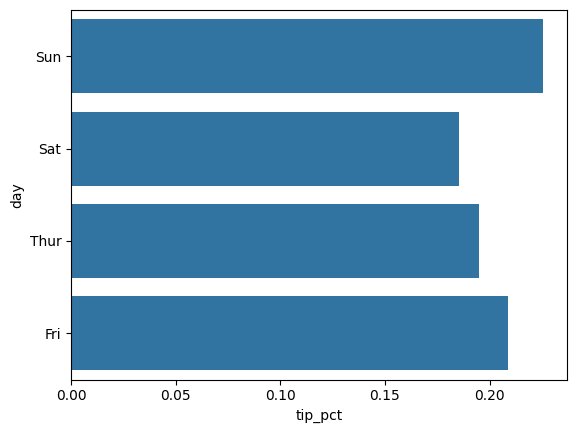

In [11]:
# 요일별 팁의 비중을 시각화(수평 막대그래프)
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # tip 비중
print(tips.head())
sns.barplot(x='tip_pct',y='day',data=tips, orient='h', errorbar=None) # errorbar는 오차 막대를 제어

<Axes: xlabel='tip_pct', ylabel='day'>

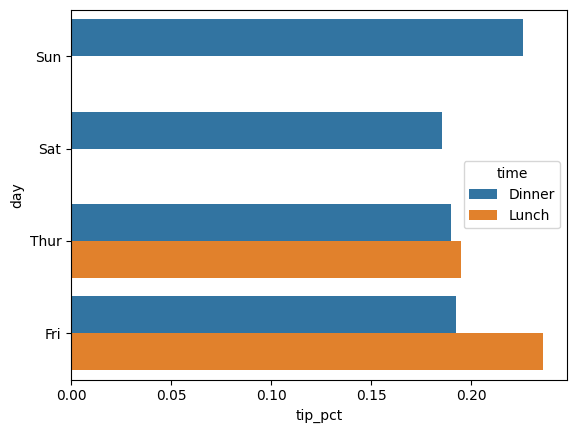

In [ ]:
sns.barplot(x='tip_pct',y='day', hue= 'time', data=tips, orient='h',errorbar=None)

In [ ]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


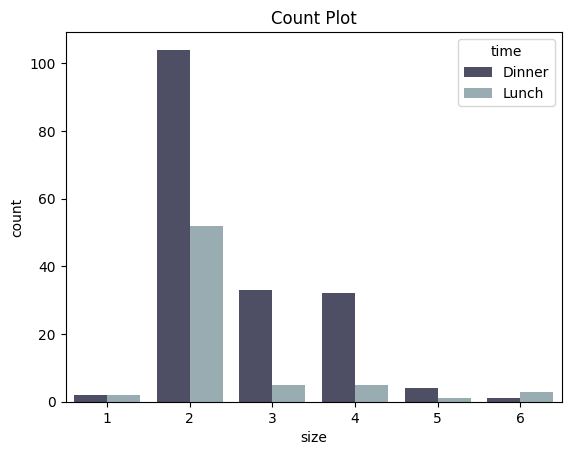

In [ ]:
# countplot()
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x='size', data=tips, hue='time', palette='bone')
plt.title("Count Plot")
plt.show()

In [ ]:
# np.random.normal(loc, scale, size) : 정규분포 난수 샘플
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))
values.describe()

count    400.000000
mean       5.066903
std        5.234141
min       -2.939559
25%        0.090412
50%        3.934660
75%       10.303451
max       14.133374
dtype: float64

커널밀도추정(Kernel Density Estimation, KDE)
- kde=True는 Seaborn의 histplot 함수에서 커널 밀도 추정(Kernel Density Estimation, KDE)을 활성화하는 옵션
- 히스토그램과 함께 데이터의 분포를 부드럽게 추정한 커널 밀도 그래프가 표시
- KDE 그래프는 데이터 포인트들이 어떻게 분포되어 있는지 시각적으로 보여주는 부드러운 곡선을 생성

<Axes: ylabel='Count'>

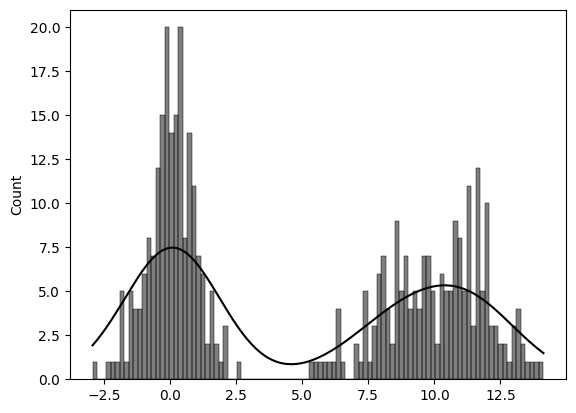

In [ ]:
sns.histplot(values,bins=100,color='k',kde=True)
# sns.displot(values,bins=100,color='k',kde=True)

Q. 두개의 정규분포를 따르는 상이한 데이터 셋을 생성한 후 하나의 데이터 셋으로 병합한 후 시각화하여 데이터의 분포를 확인하세요.

In [ ]:
fish_multi = pd.read_csv('/content/drive/MyDrive/kdt_231026/m3_분석라이브러리/visualization/dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<Axes: xlabel='length', ylabel='Count'>

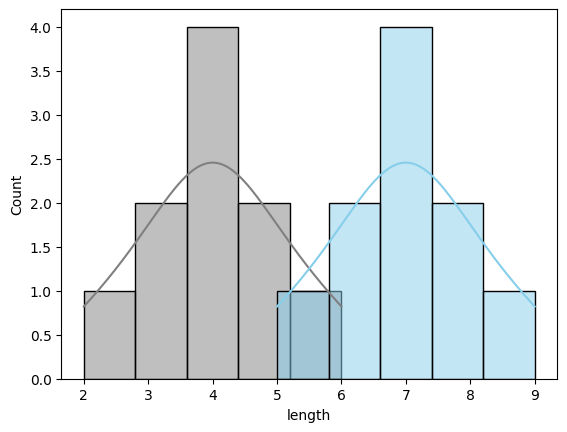

In [ ]:
length_a = fish_multi.query('species=="A"')['length']
length_b = fish_multi.query('species=="B"')['length']
sns.histplot(length_a, bins=5, color='gray', kde=True)
sns.histplot(length_b, bins=5, color='skyblue', kde=True)

In [ ]:
# Q. box plot으로 A, B 비교

<Axes: xlabel='species', ylabel='length'>

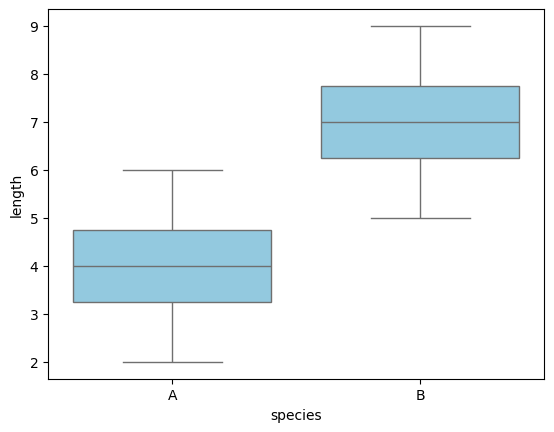

In [ ]:
# box plot
sns.boxplot(x='species',y='length',data=fish_multi,color='skyblue')

<Axes: xlabel='species', ylabel='length'>

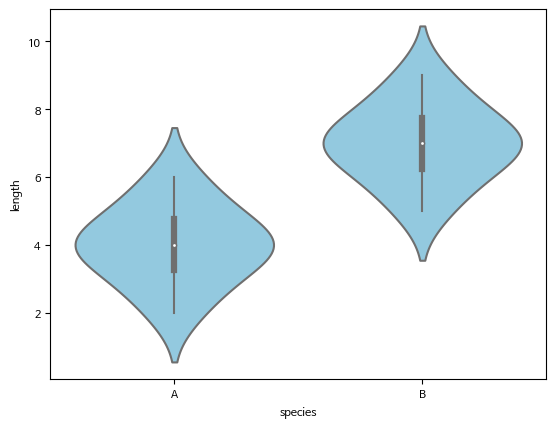

In [ ]:
# 바이올린 플롯
# 커널 밀도추정의 결과를 y축 방향에 추가하여 데이터가 퍼져있는 분산의 정도 파악
sns.violinplot(x='species',y='length',data=fish_multi,color='skyblue')

In [ ]:
cov_data = pd.read_csv('/content/drive/MyDrive/kdt_231026/m3_분석라이브러리/visualization/dataset/4_cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


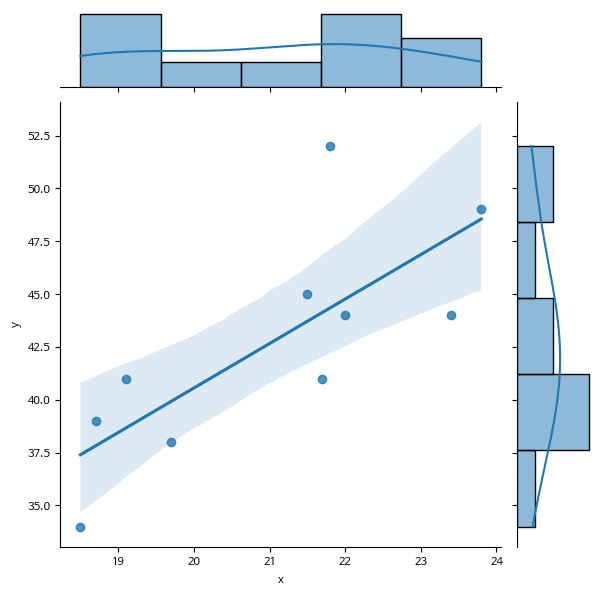

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cov_data' is your DataFrame and it has columns 'x' and 'y'
sns.jointplot(x='x', y='y', data=cov_data, kind='reg')

plt.show()

sns.lmplot과 sns.regplot 차이점

기능적 차이:
- sns.lmplot: 이 함수는 FacetGrid를 사용하여 데이터를 다양한 카테고리별로 분할하여 여러 서브플롯을 만들 수 있다. 이는 데이터의 서브셋에 대한 회귀선을 별도로 그릴 수 있음을 의미.
sns.regplot: 이 함수는 단일 축 객체(ax)에 회귀선을 그리는 데 사용. 간단하고, 한 번에 하나의 관계만 표시.

입력 매개변수의 차이:
- sns.lmplot은 data 매개변수를 통해 DataFrame을 입력받으며, x와 y는 문자열로 열 이름을 지정.
- sns.regplot에서는 x와 y가 DataFrame의 열이거나 NumPy 배열일 수 있으며, data 매개변수는 선택사항.

사용상의 유연성:
- sns.lmplot은 regplot보다 더 많은 매개변수를 제공하여, 데이터를 세분화하고 다양한 방식으로 표시.
- sns.regplot은 더 단순하고 직관적인 옵션을 제공하여, 빠르고 간편하게 선형 회귀선을 그릴 수 있게 한다.

그래픽 표현의 차이:
- sns.lmplot은 내부적으로 FacetGrid를 사용하므로, 플롯의 구성과 스타일을 더 세밀하게 조정할 수 있다.
- sns.regplot은 주로 간단한 선형 관계를 표시하는데 적합하며, 복잡한 그래픽 설정은 제한적.








In [ ]:
#  'x'와 'y' 열을 데이터 포인트로 사용하고, 'category' 열에 따라 서로 다른 색상의 선형 회귀선을 그렸습니다.
# 각 카테고리('A'와 'B')에 대한 회귀선이 서로 다른 색상으로 표시
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 임의의 데이터 생성
np.random.seed(10)
data = pd.DataFrame({
    'x': np.random.rand(50),
    'y': np.random.rand(50),
    'category': np.random.choice(['A', 'B'], 50)
})

In [ ]:
data.head()

,x,y,category
0,0.771321,0.392529,A
1,0.020752,0.093460,A
2,0.633648,0.821106,B
3,0.748804,0.151152,B
4,0.498507,0.384114,A


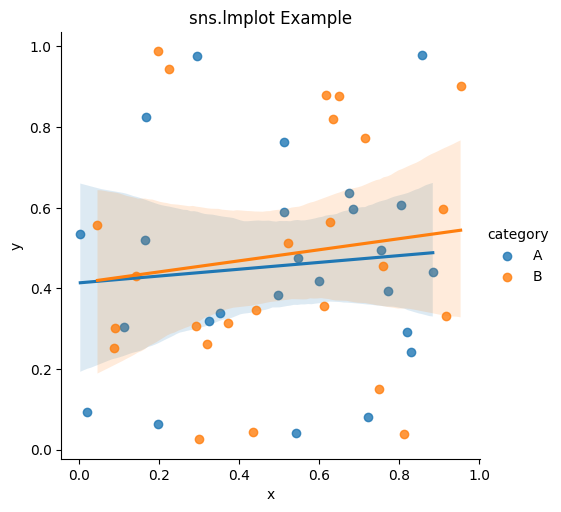

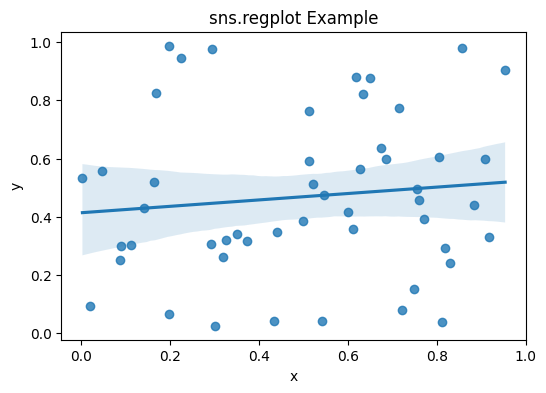

In [ ]:
# sns.lmplot 사용 예시
sns.lmplot(x='x', y='y', data=data, hue='category')
plt.title('sns.lmplot Example')
plt.show()

# sns.regplot 사용 예시
plt.figure(figsize=(6,4))
sns.regplot(x='x', y='y', data=data)
plt.title('sns.regplot Example')
plt.show()


Q. auto-mpg 데이터 셋에서 mpg와 weight의 선형 관계를 그래프로 작성하세요.(전체, origin에 따른 관계 2개 작성)

In [ ]:
import pandas as pd
df_auto = pd.read_excel('/content/drive/MyDrive/kdt_231026/m3_분석라이브러리/visualization/dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<Axes: ylabel='mpg'>

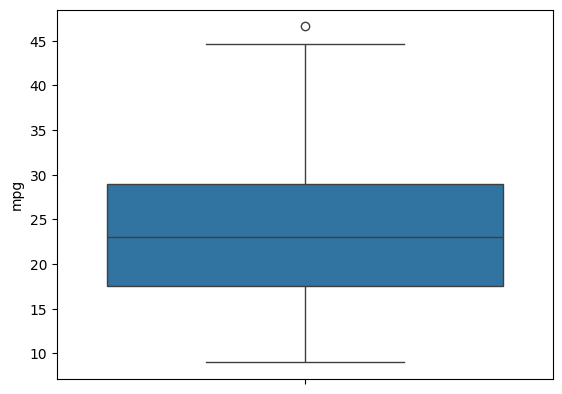

In [ ]:
sns.boxplot(data=df_auto.mpg)

<Axes: xlabel='mpg'>

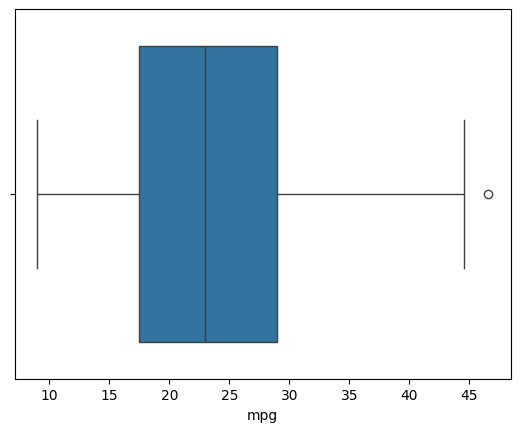

In [ ]:
sns.boxplot(data=df_auto, x='mpg')

<Axes: ylabel='mpg'>

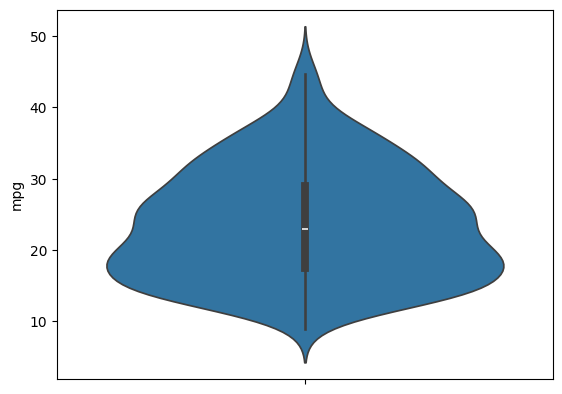

In [ ]:
sns.violinplot(data=df_auto.mpg)

<Axes: xlabel='mpg'>

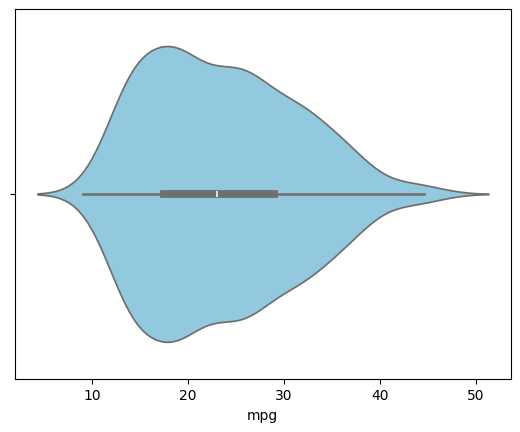

In [ ]:
sns.violinplot(data = df_auto, x = "mpg", color='skyblue')

- sns.lineplot() 함수에서는 err_style 매개변수를 이용해 밴드의 스타일을 조정할 수 있습니다.
- 예를 들어, err_style='band'로 설정하면, 투명한 밴드가 그려지고, err_style='bars'로 설정하면, 오차 막대(error bar)가 그려집니다.

<Axes: xlabel='model year', ylabel='mpg'>

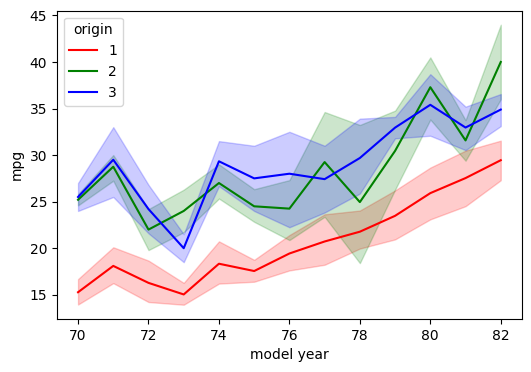

In [ ]:
plt.figure(figsize=(6,4))
sns.lineplot(data = df_auto, x = "model year", y = "mpg", hue = "origin",\
             err_style='band', palette=['red', 'green', 'blue'])

<Figure size 400x300 with 0 Axes>

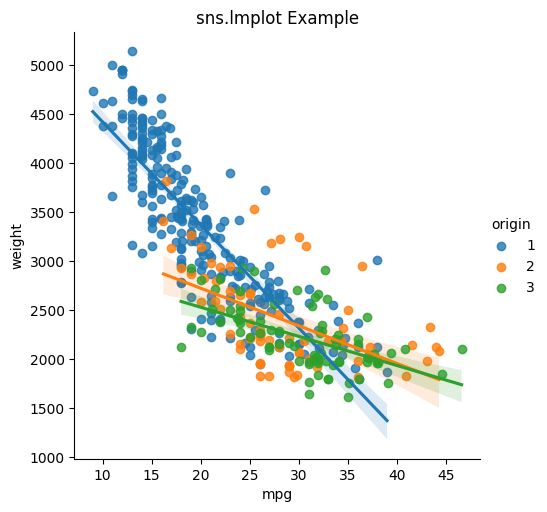

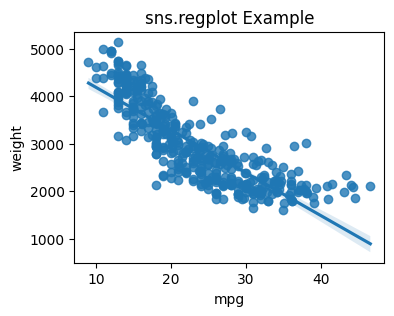

In [ ]:
plt.figure(figsize=(4,3))
sns.lmplot(x='mpg',y='weight',data=df_auto, hue='origin')
plt.title('sns.lmplot Example')
plt.show()

plt.figure(figsize=(4,3))
sns.regplot(x='mpg',y='weight',data=df_auto)
plt.title('sns.regplot Example')
plt.show()

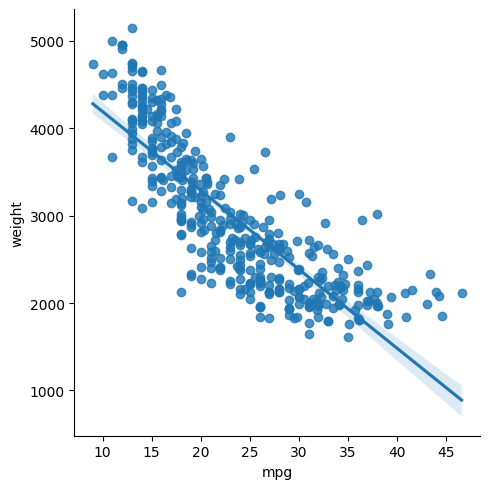

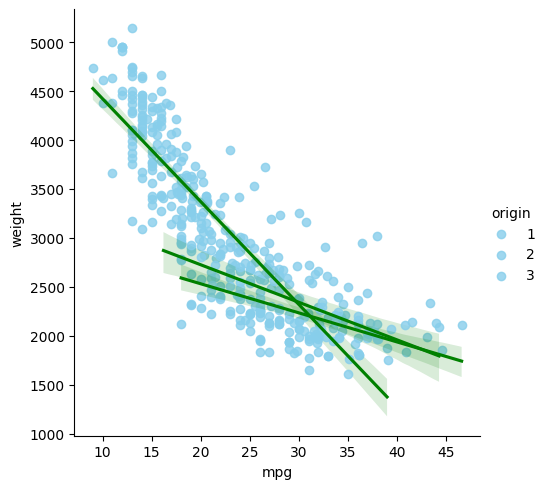

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임 df_auto 정의 필요 (예: sns.load_dataset('mpg') 사용 가능)

# 첫 번째 그래프: mpg와 weight의 선형 관계
sns.lmplot(x='mpg', y='weight', data=df_auto)

# 두 번째 그래프: origin에 따른 mpg와 weight의 선형 관계
sns.lmplot(x='mpg', y='weight', data=df_auto, hue='origin',
           scatter_kws={'color': 'skyblue'}, line_kws={'color': 'green'})

plt.show()


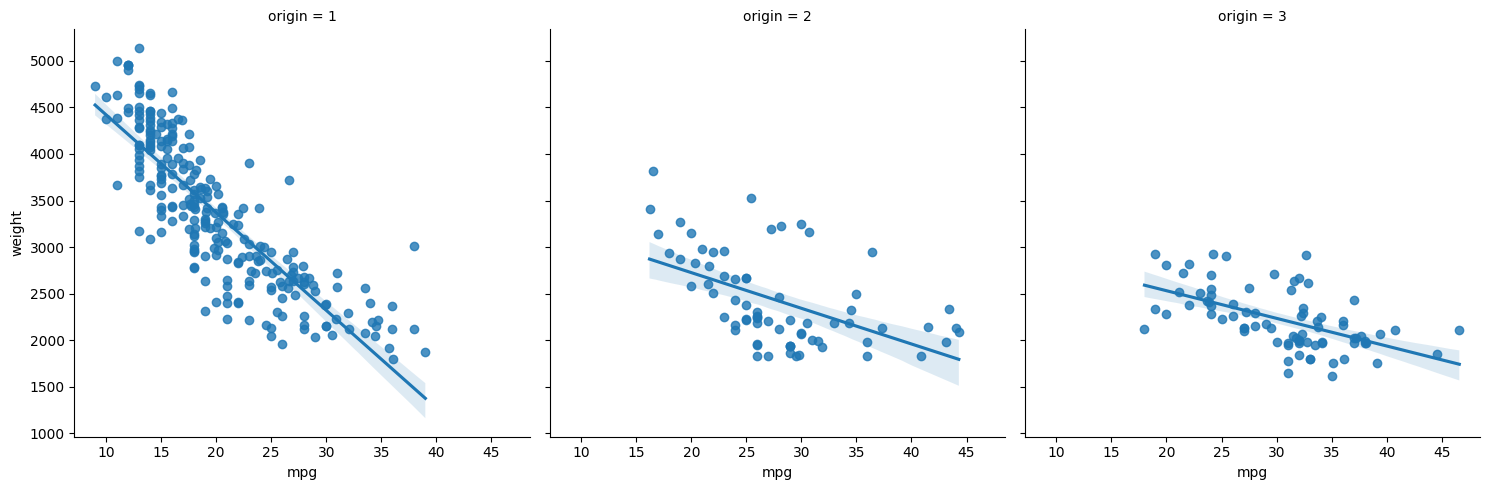

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터프레임 df_auto 정의 필요 (예: sns.load_dataset('mpg') 사용 가능)

# mpg와 weight의 관계, 1행 2열로 표시
# 첫 번째 열: 전체 데이터에 대한 그래프
sns.lmplot(x='mpg', y='weight', data=df_auto, col='origin', col_wrap=3) # col_wrap=3는 한 행에 최대 3개의 그래프를 표시하도록 설정

plt.show()


<Axes: xlabel='mpg', ylabel='weight'>

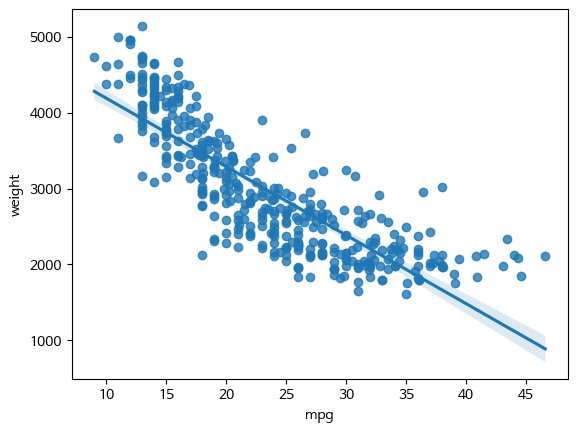

In [ ]:
# sns.regplot(x='mpg',y='weight',data=df_auto, fit_reg=False)
sns.regplot(x='mpg',y='weight',data=df_auto) # default : fig_reg=True

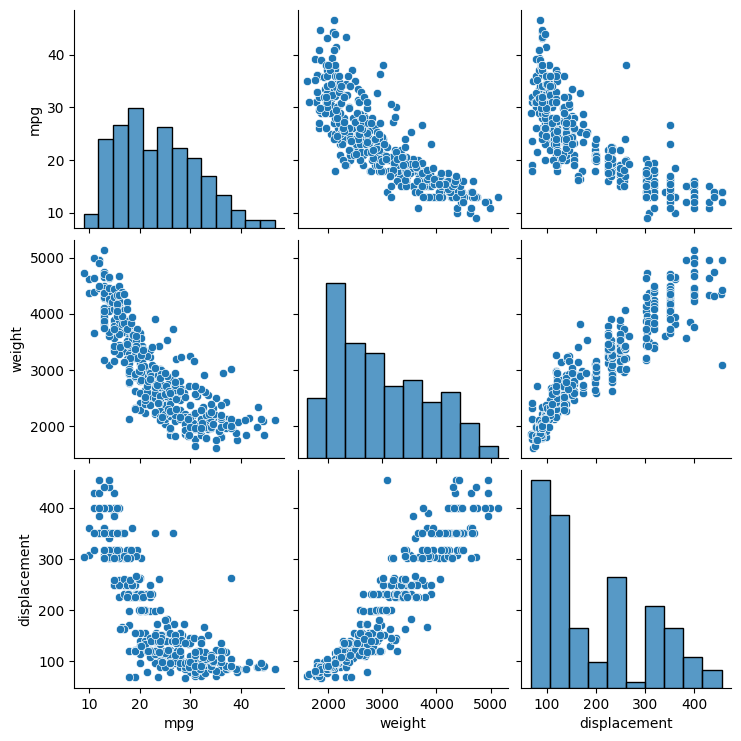

In [ ]:
import seaborn as sns
# sns.pairplot(df_auto[['mpg','weight','displacement','origin']], hue='origin', palette='rainbow')
sns.pairplot(df_auto[['mpg','weight','displacement']], palette='rainbow')

In [ ]:
t_df = sns.load_dataset('titanic')
t_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
t_df[['pclass','age','fare','survived']].corr()

,pclass,age,fare,survived
pclass,1.000000,-0.369226,-0.549500,-0.338481
age,-0.369226,1.000000,0.096067,-0.077221
fare,-0.549500,0.096067,1.000000,0.257307
survived,-0.338481,-0.077221,0.257307,1.000000


Text(0.5, 1.0, 'Heatmap of the Dataset')

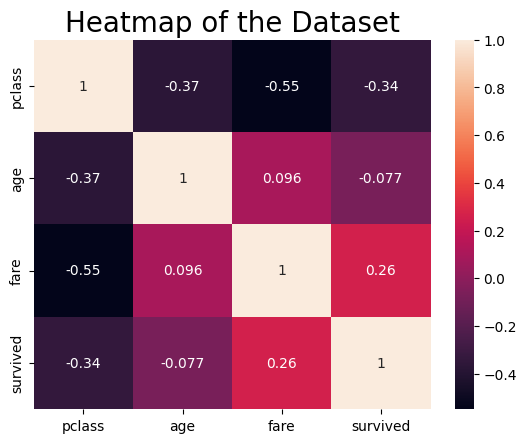

In [ ]:
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(),annot=True)
plt.title('Heatmap of the Dataset',fontsize=20)

Q. sex와 class간의 생존율을 보여주는 히트맵을 작성하세요.

<Axes: xlabel='sex', ylabel='class'>

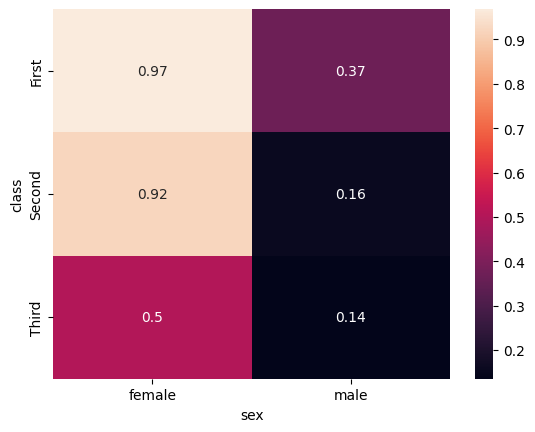

In [ ]:
pivot = pd.pivot_table(t_df,index='class',
               columns='sex',
               values='survived',
               aggfunc=(lambda x:x.sum()/x.count()),fill_value=0)
sns.heatmap(pivot,annot=True)

In [ ]:
table = t_df.pivot_table(index=['sex'],columns=['class'],values=['survived'],
                        aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<Axes: xlabel='None-class', ylabel='sex'>

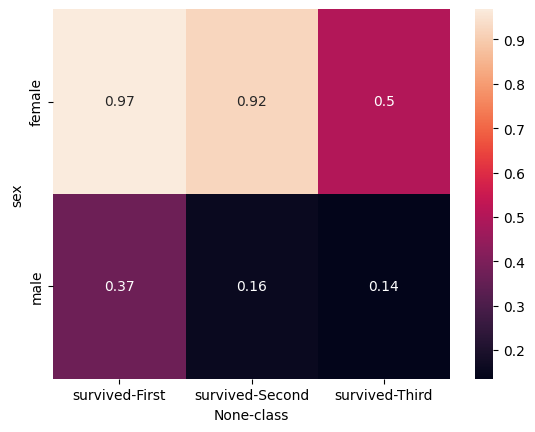

In [ ]:
sns.heatmap(table, annot=True)

<Axes: xlabel='None-class', ylabel='sex'>

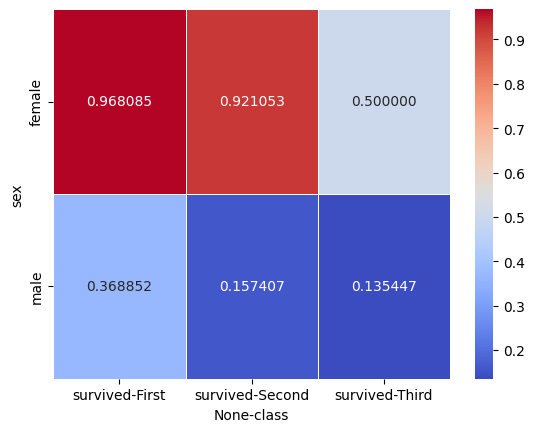

In [ ]:
sns.heatmap(table,
           annot=True, fmt='f',
           cmap='coolwarm', # 'YlGnBu','plasma','viridis'
           linewidth=.5,
           cbar=True)

In [ ]:
import numpy as np
fish_data = np.array([ 5, 7, 9,1,5, 6, 6, 2,  4,  4,  5,  6,  7,  3,  8, 10])

<Axes: ylabel='Count'>

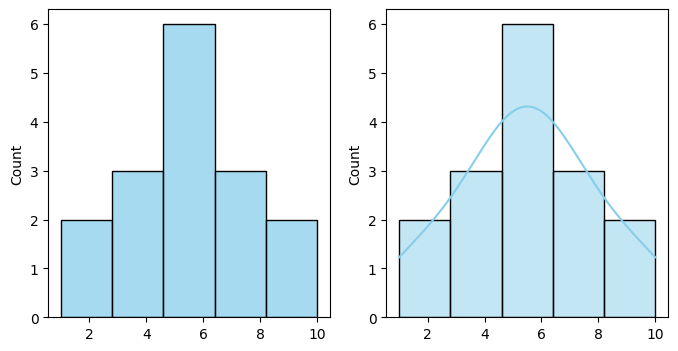

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.histplot(fish_data,color='skyblue',kde=False,ax=ax1)
sns.histplot(fish_data,color='skyblue',kde=True,ax=ax2)

In [ ]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/kdt_231026/m3_분석라이브러리/visualization/dataset/credit_card.xls', sheet_name='Data',header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.shape

(30000, 25)

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# 전처리
# PAY_0 칼럼을 PAY_1으로 'default payment next month' 칼럼도 'default'로 칼럼명
# 변경. ID 삭제.
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'},\
          inplace=True)
y_target = df['default']
X_features = df.drop(['default','ID'], axis=1)

<Axes: >

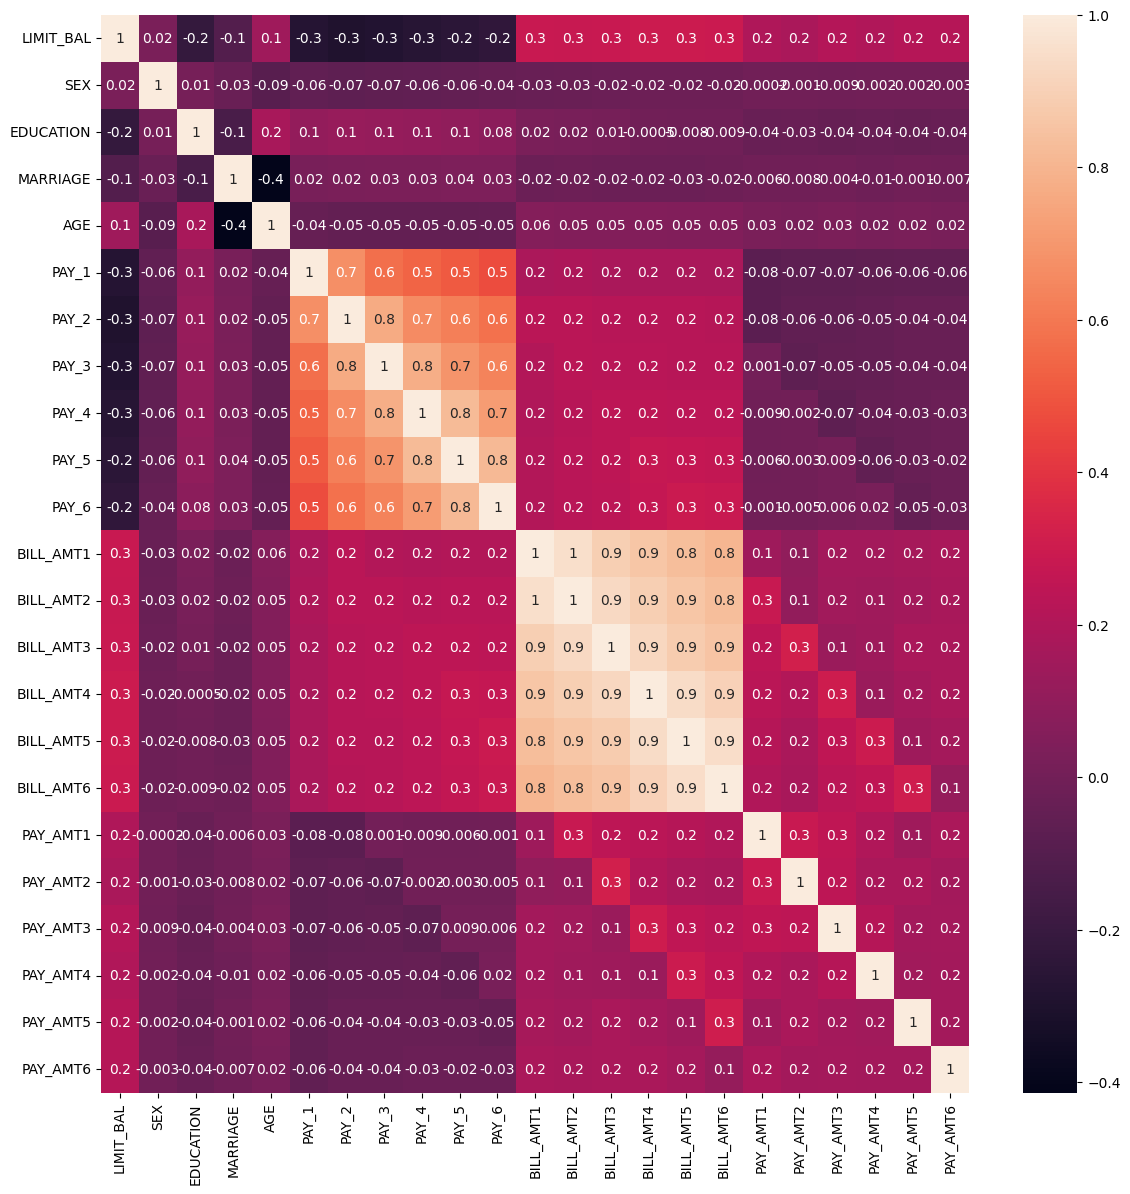

In [ ]:
# 23개의 속성 데이터가 있으나 속성간 상관도가 높을 수 있으므로 corr()를 이용해
# 속성간 상관도 구한 뒤 시본으로 시각화하여 확인
import seaborn as sns
import matplotlib.pyplot as plt

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

Q1_0117. 타이타닉 데이터셋(sns.load_dataset('titanic'))을 사용하여, 클래스(class)별 승객 수를 나타내는 막대 그래프를 생성하세요.
- 각 막대 위에 승객 수 표시

Text(0, 0.5, 'Number of Passengers')

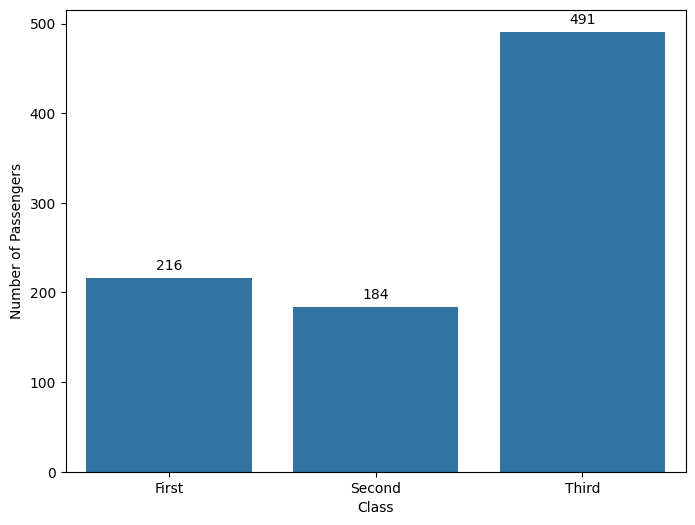

In [ ]:
titanic = sns.load_dataset('titanic')
df = sns.load_dataset('titanic')

class_counts = titanic['class'].value_counts()
plt.figure(figsize=(8,6))
barplot = sns.barplot(x=class_counts.index, y=class_counts.values)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0,9), # xytext=(0, 5) 설정은 주석 텍스트를 막대의 정상부 중앙에서 바로 위로 조금 올려서 표시
                     textcoords = 'offset points')

plt.xlabel('Class')
plt.ylabel('Number of Passengers')

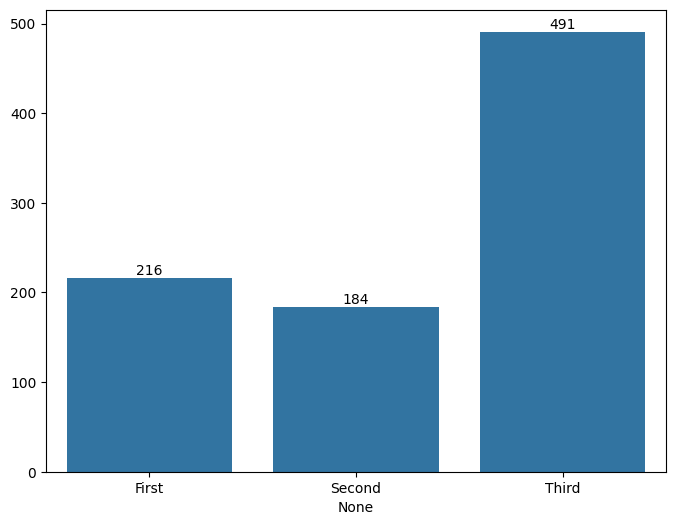

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')
counts = df['class'].value_counts()
plt.figure(figsize=(8,6))
barplot = sns.barplot(x=counts.index, y=counts.values)
barplot.bar_label(barplot.containers[0])
plt.show()

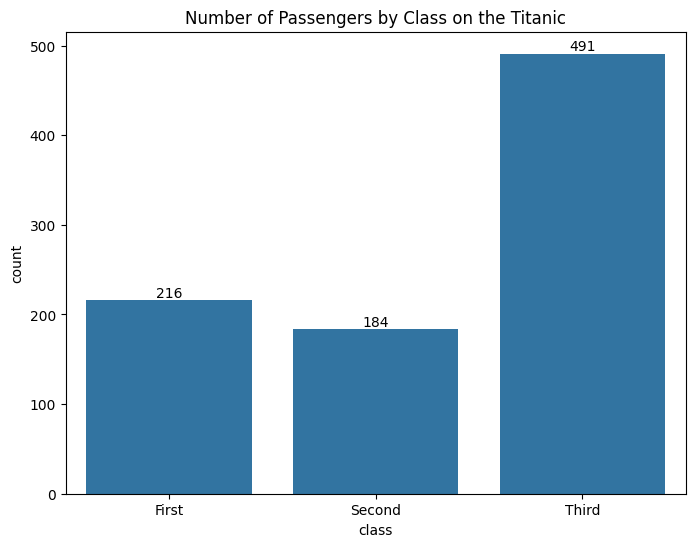

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='class', data=titanic)
plt.title('Number of Passengers by Class on the Titanic')

# 각 막대 위에 승객 수 표시
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


Q2_0117. sns.load_dataset('flights')을 로드하고, 이를 피벗 테이블로 변환하여 연도별 월간 승객 수를 나타내세요. 이 데이터를 사용하여 히트맵을 생성하세요. 색상 맵은 자유롭게 선택하세요.

<ipython-input-9-6b79a52bed37>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_flights = flights.pivot("month", "year", "passengers")


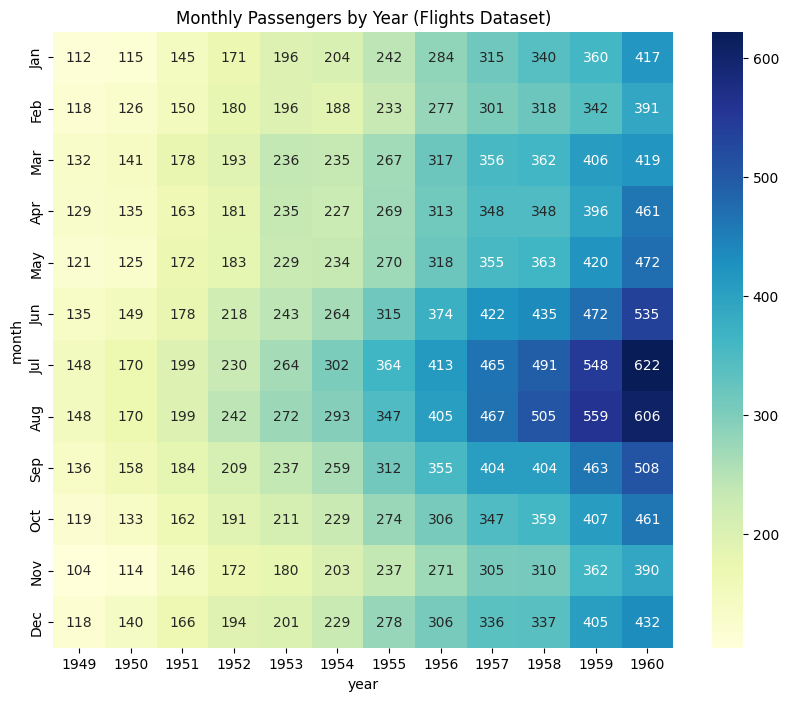

In [ ]:
flights = sns.load_dataset('flights')
pivot_flights = flights.pivot("month", "year", "passengers")
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_flights, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Monthly Passengers by Year (Flights Dataset)')
plt.show()

In [ ]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<ipython-input-3-6dbd14bf2758>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights_pivot = flights.pivot("month", "year", "passengers")


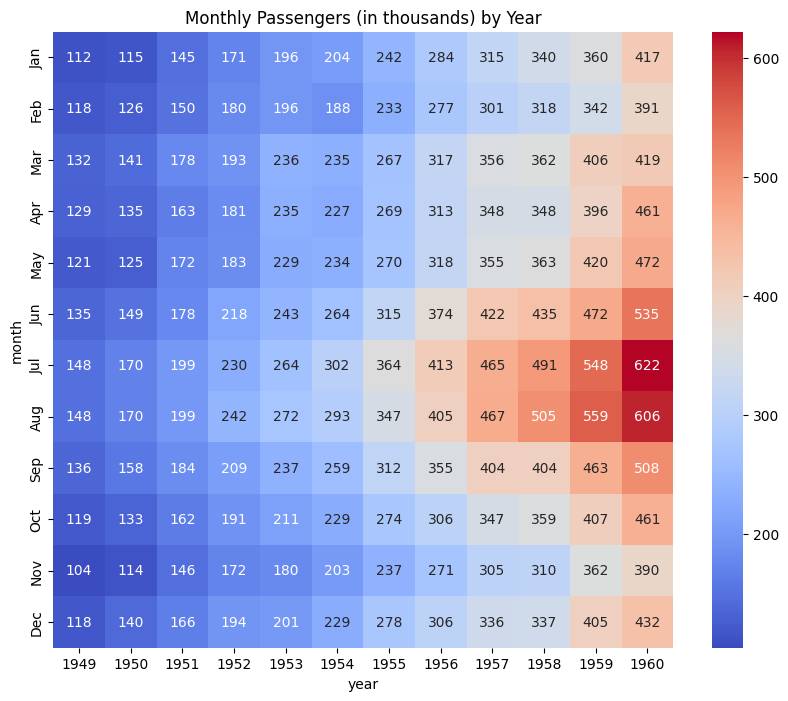

In [ ]:
# flights = sns.load_dataset('flights')
flights_pivot = flights.pivot("month", "year", "passengers")
plt.figure(figsize=(10, 8))
sns.heatmap(flights_pivot, cmap='coolwarm', annot=True, fmt='d')
plt.title('Monthly Passengers (in thousands) by Year')
plt.show()


Q3_0117. sns.load_dataset('penguins')을 사용하여 페어플롯(pairplot)을 생성하세요. 종(species)에 따라 다른 색상을 사용하세요.

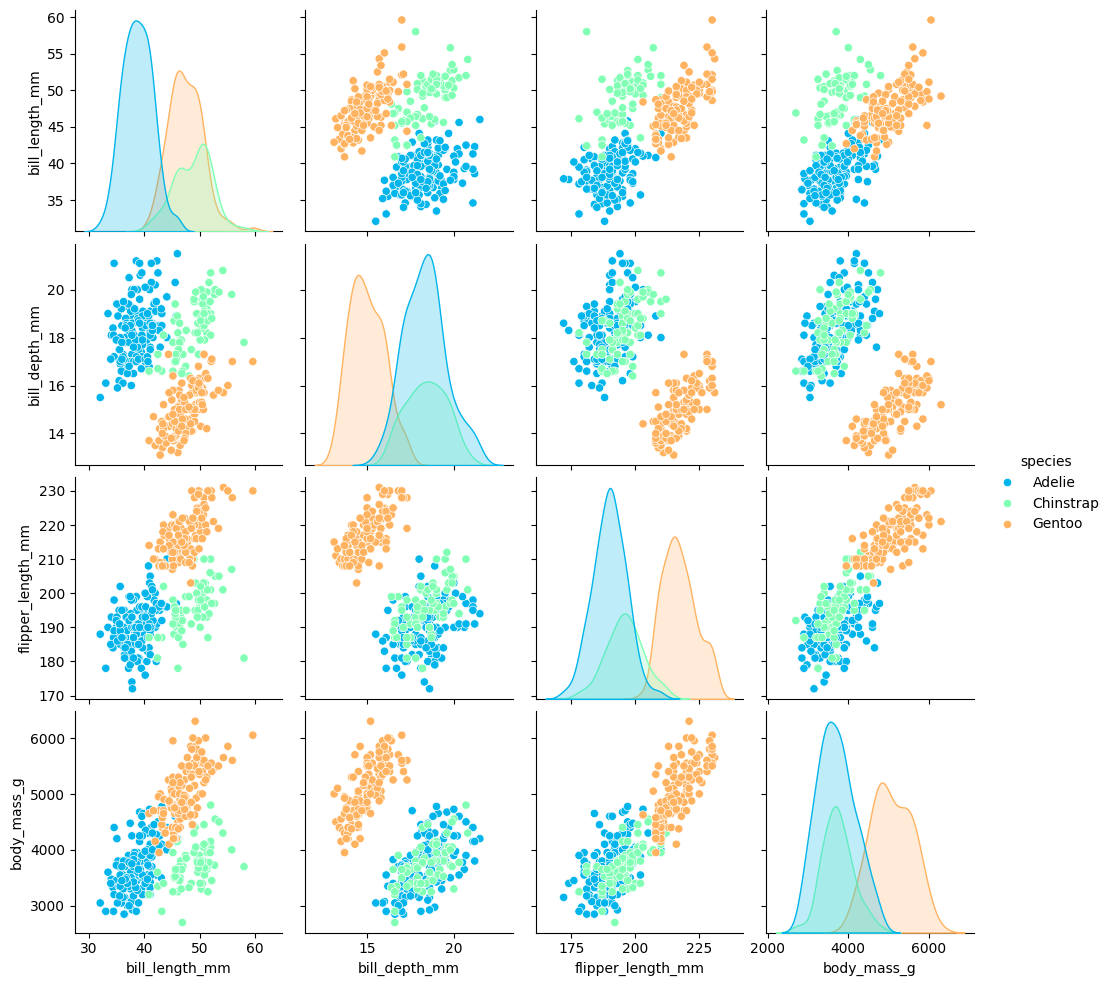

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_pg = sns.load_dataset('penguins')
sns.pairplot(df_pg, hue='species', palette='rainbow')

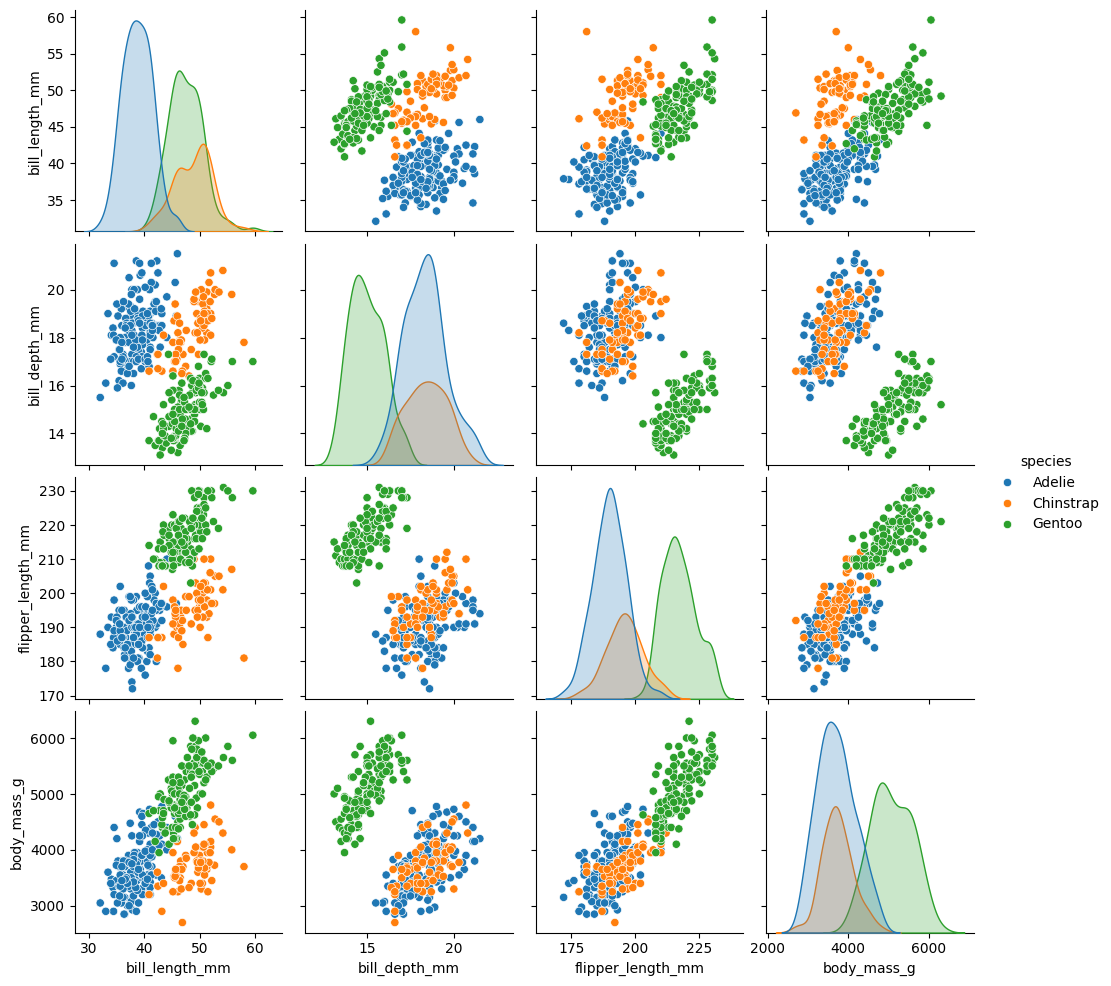

In [ ]:
penguins = sns.load_dataset('penguins')
sns.pairplot(penguins, hue='species')
plt.show()


Q4_0117. 타이타닉 데이터셋을 사용하여, 객실 등급(class)에 따른 탑승객의 나이를 나타내는 박스 플롯과 바이올린 플롯을 같은 그래프 내에서 나란히 생성하세요. 이를 통해 각 클래스별 나이 분포의 차이를 비교하세요.

<Axes: xlabel='pclass', ylabel='age'>

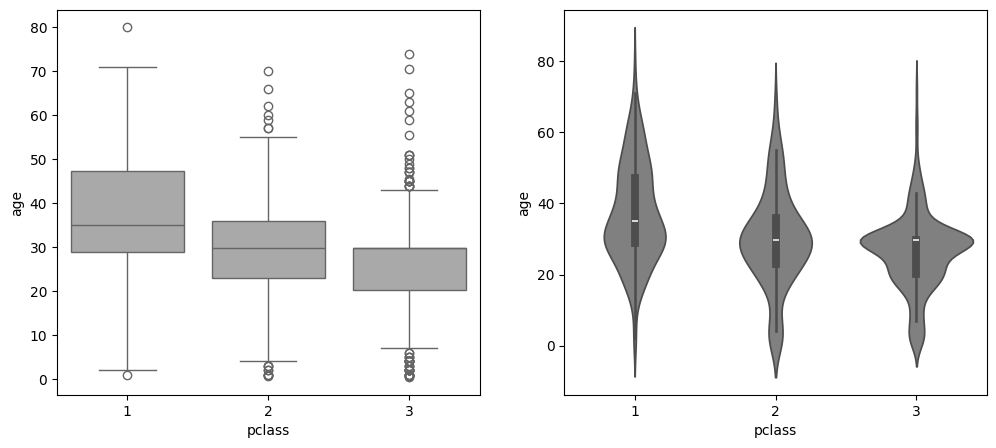

In [ ]:
import numpy as np
ttn = sns.load_dataset('titanic')
ttn['age'].replace(np.nan, ttn['age'].mean(), inplace = True)
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
sns.boxplot(x = ttn['pclass'], y = ttn['age'], color = 'darkgray')

plt.subplot(1,2,2)
sns.violinplot(x = ttn['pclass'], y = ttn['age'], color = 'gray')

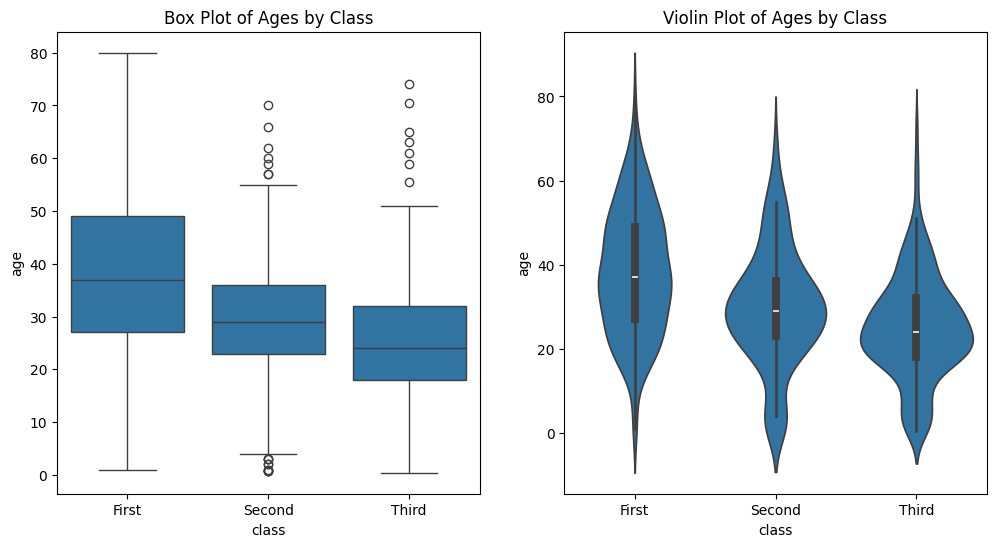

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='class', y='age', data=titanic)
plt.title('Box Plot of Ages by Class')

plt.subplot(1, 2, 2)
sns.violinplot(x='class', y='age', data=titanic)
plt.title('Violin Plot of Ages by Class')
plt.show()


Q5_0117. 펭귄 데이터셋을 사용하여, 각 종별로 섬(island)별 개체 수를 나타내는 카운트 플롯을 생성하세요. x축은 'island', hue는 'species'로 설정하세요.

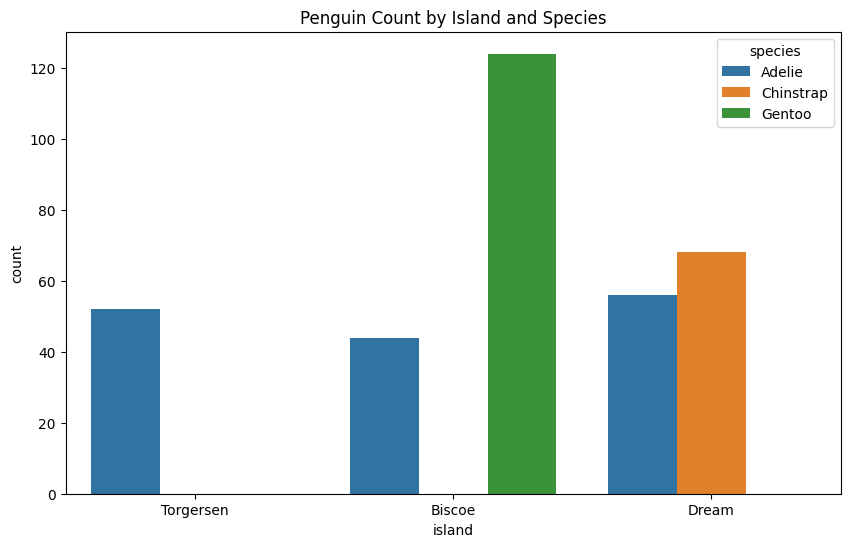

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'penguins' 데이터셋을 로드
penguins = sns.load_dataset('penguins')

# 각 종별로 섬(island)별 개체 수를 나타내는 카운트 플롯 생성
plt.figure(figsize=(10, 6))
sns.countplot(x='island', hue='species', data=penguins)
plt.title('Penguin Count by Island and Species')
plt.show()

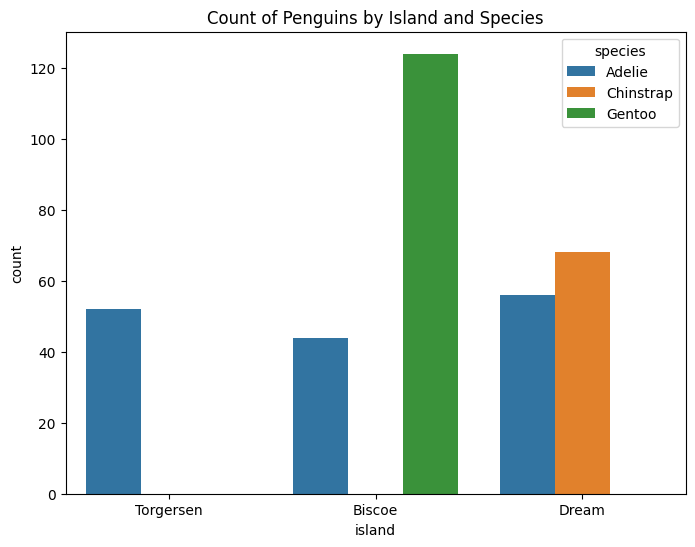

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='island', hue='species', data=penguins)
plt.title('Count of Penguins by Island and Species')
plt.show()
